# TELECOM CHURN CASE STUDY


Business Objective:

In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
This project is to build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [22]:
## Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
 

In [23]:
pd.set_option('display.max_columns', 300)

# Loading the dataset and understanding the data



In [24]:
data = pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [25]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [27]:
# Checking the missing value present in the dataset

data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [28]:
# calculating the percentage of missing values

data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [29]:
#Columns having more than 30% missing values will be dropped

drop_column_list = list(data_missing_values.index[data_missing_values['null']> 30])

data= data.drop(drop_column_list , axis=1)

In [30]:
data.shape

(99999, 186)

In [31]:
# Date columns are not reuired in the analysis hence we will drop those columns

data_date = [x for x in data.columns.to_list() if 'date' in x]
print(data_date)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [32]:
data = data.drop(data_date , axis=1)

In [33]:
data.shape

(99999, 178)

# Filtering high-value customers

As asked we need to predict churn only for high-value customers. 
Here we define high-value customers as follows: 
Those who have recharged with an amount more than or equal to X, 
where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.
The months are encoded as 6, 7, 8 and 9, respectively. 
Here first two months are june(6) and july(7).


 

In [34]:
# Calculating average recharge amount for the month of 6 and 7 

data['avg_recharge_amount'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [35]:
#calculating 70th percentile of the avg recharge amount for the moth of 6 and 7

X= data['avg_recharge_amount'].quantile(0.7)
X

368.5

In [36]:
#looking for the customers who have recharged more than 70th percentile


data = data[data['avg_recharge_amount'] >= X]
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0

In [37]:
data.shape

(30011, 179)

In [38]:
#checking rows having missing values more than 50%

data_missing_rows= data[(data.isnull().sum(axis=1)) > len(data.columns)//2]
data_missing_rows.shape


(114, 179)

In [39]:
data = data.drop(data_missing_rows.index)
data.shape

(29897, 179)

In [40]:
data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values

,null
spl_og_mou_9,5.32
loc_og_t2t_mou_9,5.32
std_og_t2f_mou_9,5.32
loc_ic_mou_9,5.32
loc_ic_t2m_mou_9,5.32
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00


# 
In the month of September(9), MOU for all the call types have missing values

In [41]:
# Extracting the missing columns of MOU for the month of september(9)

print(((data_missing_values[data_missing_values['null'] == 5.32]).index).to_list())

['spl_og_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2f_mou_9', 'loc_ic_mou_9', 'loc_ic_t2m_mou_9', 'roam_og_mou_9', 'std_ic_t2f_mou_9', 'std_og_t2m_mou_9', 'std_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2f_mou_9', 'loc_og_t2m_mou_9', 'std_og_t2t_mou_9', 'loc_og_t2f_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'std_ic_t2o_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'std_og_mou_9', 'ic_others_9', 'isd_og_mou_9', 'isd_ic_mou_9', 'og_others_9', 'spl_ic_mou_9', 'loc_og_t2c_mou_9', 'onnet_mou_9', 'std_ic_mou_9', 'std_og_t2c_mou_9']


In [42]:
# creating a dataframe where MOU for the month September is null

data_mou_9 = data[(data['spl_og_mou_9'].isnull()) & (data['loc_og_t2t_mou_9'].isnull()) & (data['std_og_t2f_mou_9'].isnull()) & (data['loc_ic_mou_9'].isnull()) & (data['loc_ic_t2m_mou_9'].isnull()) & (data['roam_og_mou_9'].isnull()) & (data['std_ic_t2f_mou_9'].isnull()) & (data['std_og_t2m_mou_9'].isnull()) & (data['std_ic_t2m_mou_9'].isnull()) & (data['loc_ic_t2t_mou_9'].isnull()) & (data['loc_ic_t2f_mou_9'].isnull()) & (data['loc_og_t2m_mou_9'].isnull()) & (data['std_og_t2t_mou_9'].isnull()) & (data['loc_og_t2f_mou_9'].isnull()) & (data['std_ic_t2t_mou_9'].isnull()) & (data['loc_og_mou_9'].isnull()) & (data['std_ic_t2o_mou_9'].isnull()) & (data['roam_ic_mou_9'].isnull()) &  (data['offnet_mou_9'].isnull()) & (data['std_og_mou_9'].isnull()) & (data['ic_others_9'].isnull()) & (data['isd_og_mou_9'].isnull()) & (data['isd_ic_mou_9'].isnull()) & (data['og_others_9'].isnull()) & (data['spl_ic_mou_9'].isnull()) & (data['loc_og_t2c_mou_9'].isnull()) & (data['onnet_mou_9'].isnull()) & (data['std_ic_mou_9'].isnull()) & (data['std_og_t2c_mou_9'].isnull())]

data_mou_9.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.00,0.0,0.0,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.0,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.0,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,221.06,NaN,74.54,43.66,31.86,NaN,0.00,0.00,6.16,NaN,0.00,0.00,23.91,NaN,2.83,16.19,9.73,NaN,16.99,23.14,17.79,NaN,3.54,1.46,1.83,NaN,0.40,0.0,0.0,NaN,23.38,40.81,29.36,NaN,430.76,399.46,191.31,NaN,53.59,13.81,8.33,NaN,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,484.36,413.28,199.64,NaN,0.0,0.00,0.00,NaN,2.54,11.81,2.01,NaN,0.86,0.0,0.0,NaN,511.16,465.91,231.03,0.0,11.61,32.89,4.46,NaN,16.94,26.94,26.63,NaN,0.98,0.63,0.00,NaN,29.54,60.48,31.09,NaN,0.49

In [43]:
data_mou_9.shape

(1590, 179)

In [44]:
#dropping the null values from mou of september

data = data.drop(data_mou_9.index)

In [45]:
# Checking the missing value

data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values

,null
ic_others_8,0.55
spl_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
std_og_t2t_mou_8,0.55
loc_ic_t2m_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


In [46]:
# Extracting the missing columns of MOU for the month of August(8)

print(((data_missing_values[data_missing_values['null'] == 0.55]).index).to_list())

['ic_others_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'og_others_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'std_ic_t2t_mou_8', 'offnet_mou_8', 'std_ic_t2m_mou_8', 'isd_ic_mou_8', 'std_ic_t2f_mou_8', 'onnet_mou_8', 'spl_ic_mou_8', 'std_ic_t2o_mou_8']


In [47]:
# creating a dataframe where MOU for the month August is null


data_mou_8 = data[(data['ic_others_8'].isnull()) & (data['spl_og_mou_8'].isnull()) & (data['loc_ic_t2f_mou_8'].isnull()) & (data['std_og_t2t_mou_8'].isnull()) & (data['loc_ic_t2m_mou_8'].isnull()) & (data['loc_ic_t2t_mou_8'].isnull()) & (data['loc_og_t2t_mou_8'].isnull()) & (data['og_others_8'].isnull()) & (data['loc_og_t2m_mou_8'].isnull()) & (data['isd_og_mou_8'].isnull()) & (data['roam_ic_mou_8'].isnull()) & (data['loc_og_t2f_mou_8'].isnull()) & (data['std_og_mou_8'].isnull()) & (data['loc_og_t2c_mou_8'].isnull()) & (data['std_og_t2c_mou_8'].isnull()) & (data['std_og_t2f_mou_8'].isnull()) & (data['loc_og_mou_8'].isnull()) & (data['std_og_t2m_mou_8'].isnull()) & (data['loc_ic_mou_8'].isnull()) & (data['roam_og_mou_8'].isnull()) & (data['std_ic_mou_8'].isnull()) & (data['std_ic_t2t_mou_8'].isnull()) & (data['offnet_mou_8'].isnull()) & (data['std_ic_t2m_mou_8'].isnull()) & (data['isd_ic_mou_8'].isnull()) & (data['std_ic_t2f_mou_8'].isnull()) & (data['onnet_mou_8'].isnull()) & (data['spl_ic_mou_8'].isnull()) & (data['std_ic_t2o_mou_8'].isnull())]

In [48]:
data_mou_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount
375,7002252754,109,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,NaN,245.06,62.24,37.24,NaN,144.53,25.49,19.43,NaN,0.00,312.59,78.58,NaN,0.00,0.00,0.00,NaN,11.54,0.00,0.00,NaN,25.31,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.41,0.00,0.00,NaN,36.86,0.00,0.00,NaN,233.51,0.00,0.00,NaN,118.79,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,352.31,0.0,0.0,NaN,0.0,0.00,0.00,NaN,4.78,0.00,0.0,NaN,0.0,0.00,0.00,0.0,393.96,0.00,0.00,NaN,6.74,0.00,0.00,NaN,38.53,0.00,0.00,NaN,0.0,0.00,0.00,NaN,45.28,0.00,0.00,NaN,8.31,0.00,0.00,NaN,27.31,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.00,0.00,NaN,35.63,0.00,0.00,0.0,80.91,0.00,0.0,NaN,0.00,0.0,0.0,NaN,0.0,0.00,0.0,NaN,0.0,17,6,3,11,700,130,0,440,80,50,0,50,30,0,0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,109,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,NaN,0.00,487.06,139.71,NaN,1.26,0.00,2.01,NaN,6.43,0.00,6.30,NaN,1.26,11.28,27.89,NaN,0.00,42.24,46.94,NaN,0.00,0.0,0.0,NaN,0.0,2.33,0.0,NaN,0.00,53.53,74.84,NaN,0.00,706.73,178.53,NaN,0.00,442.48,92.76,NaN,0.00,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1149.21,271.29,NaN,0.00,0.0,0.0,NaN,0.0,2.58,1.21,NaN,0.00,1.55,0.0,NaN,0.0,1206.88,347.36,0.0,0.00,48.01,63.39,NaN,0.00,83.09,64.31,NaN,0.00,0.00,0.00,NaN,0.0,131.11,127.71,NaN,0.00,24.98,46.43,NaN,0.00,1.63,16.69,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,0.0,26.61,63.13,NaN,0.00,157.73,190.84,0.0,0.00

In [49]:
#dropping the null values from mou of august

data = data.drop(data_mou_8.index)


In [50]:
# Checking missing values


data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values

,null
loc_ic_t2f_mou_6,0.44
loc_og_t2t_mou_6,0.44
loc_og_t2f_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_og_mou_6,0.44
...,...
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00


In [51]:
# Extracting the missing columns of MOU for the month of June(6)

print(((data_missing_values[data_missing_values['null'] == 0.44]).index).to_list())

['loc_ic_t2f_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'ic_others_6', 'loc_ic_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'spl_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_og_mou_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6']


In [52]:
#creating a dataframe where MOU for the month June is null

data_mou_6 = data[(data['loc_ic_t2f_mou_6'].isnull()) & (data['loc_og_t2t_mou_6'].isnull()) &  (data['loc_og_t2f_mou_6'].isnull()) & (data['loc_og_t2c_mou_6'].isnull()) & (data['loc_og_mou_6'].isnull()) & (data['std_og_t2t_mou_6'].isnull()) & (data['std_og_t2m_mou_6'].isnull()) & (data['std_og_t2f_mou_6'].isnull()) & (data['std_og_mou_6'].isnull()) & (data['isd_og_mou_6'].isnull()) & (data['spl_og_mou_6'].isnull()) & (data['og_others_6'].isnull()) & (data['loc_ic_t2t_mou_6'].isnull()) & (data['loc_ic_t2m_mou_6'].isnull()) & (data['ic_others_6'].isnull()) & (data['loc_ic_mou_6'].isnull()) & (data['isd_ic_mou_6'].isnull()) & (data['std_ic_t2t_mou_6'].isnull()) & (data['std_ic_t2m_mou_6'].isnull()) & (data['spl_ic_mou_6'].isnull()) & (data['std_ic_t2f_mou_6'].isnull()) & (data['std_ic_t2o_mou_6'].isnull()) & (data['std_ic_mou_6'].isnull()) & (data['loc_og_t2m_mou_6'].isnull()) & (data['std_og_t2c_mou_6'].isnull()) & (data['roam_og_mou_6'].isnull()) & (data['onnet_mou_6'].isnull()) & (data['offnet_mou_6'].isnull()) & (data['roam_ic_mou_6'].isnull())]

In [53]:
data_mou_6.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount
77,7001328263,109,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,149.69,6.31,NaN,39.44,179.18,57.68,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,34.23,149.69,6.31,NaN,32.18,101.63,29.41,NaN,0.91,29.86,28.26,NaN,0.0,3.9,0.00,NaN,67.33,281.19,63.99,NaN,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,6.35,40.09,0.0,NaN,0.0,0.0,0.0,NaN,6.35,40.09,0.00,NaN,2.93,28.04,3.25,NaN,0.00,7.58,0.00,NaN,0.0,0.0,0.0,0.0,76.61,356.93,67.24,NaN,79.46,191.24,5.26,NaN,43.31,94.18,16.39,NaN,2.03,0.00,15.78,NaN,124.81,285.43,37.44,NaN,8.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,15.93,NaN,0.0,0.0,0.0,NaN,8.00,0.00,15.93,0.0,135.38,289.33,53.38,NaN,0.0,0.0,0.0,NaN,2.56,0.50,0.00,NaN,0.0,3.39,0.0,4,5,3,3,0,1154,750,0,0,1000,750,0,0,0,750,0,0.0,96.48,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,109,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,198.96,571.99,NaN,845.11,923.58,828.29,NaN,0.0,0.00,0.0,NaN,0.0,0.00,0.00,NaN,28.78,7.46,64.73,NaN,78.78,584.76,490.71,NaN,21.58,9.43,0.00,NaN,0.0,0.0,2.78,NaN,129.14,601.66,555.44,NaN,404.71,191.49,507.26,NaN,722.01,321.41,302.91,NaN,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,1126.73,512.91,810.18,NaN,0.00,0.00,0.00,NaN,45.14,13.84,37.74,NaN,0.0,0.0,0.0,0.0,1301.03,1128.43,1403.38,NaN,7.41,10.23,17.46,NaN,69.39,93.48,44.89,NaN,0.00,0.83,0.00,NaN,76.81,104.54,62.36,NaN,5.81,10.09,22.36,NaN,37.94,86.63,34.49,NaN,0

In [54]:
#dropping the null values from mou of June

data = data.drop(data_mou_6.index)

In [55]:
# Checking missing values 


data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values

,null
std_og_t2m_mou_7,0.12
loc_og_t2t_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00


In [56]:
# Extracting the missing columns of MOU for the month of July(7)

print(((data_missing_values[data_missing_values['null'] == 0.12]).index).to_list())


['std_og_t2m_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'isd_ic_mou_7', 'spl_og_mou_7', 'spl_ic_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2f_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_og_mou_7', 'roam_ic_mou_7', 'offnet_mou_7', 'onnet_mou_7']


In [57]:
# #creating a dataframe where MOU for the month July is null

data_mou_7 = data[(data['std_og_t2m_mou_7'].isnull()) & (data['loc_og_t2t_mou_7'].isnull()) & (data['loc_og_t2f_mou_7'].isnull()) & (data['loc_og_t2c_mou_7'].isnull()) & (data['loc_og_mou_7'].isnull()) & (data['std_og_t2t_mou_7'].isnull()) & (data['std_og_t2f_mou_7'].isnull()) & (data['std_og_t2c_mou_7'].isnull()) & (data['std_og_mou_7'].isnull()) & (data['ic_others_7'].isnull()) & (data['isd_og_mou_7'].isnull()) & (data['isd_ic_mou_7'].isnull()) & (data['spl_og_mou_7'].isnull()) & (data['spl_ic_mou_7'].isnull()) & (data['og_others_7'].isnull()) & (data['loc_ic_t2t_mou_7'].isnull()) & (data['std_ic_mou_7'].isnull()) & (data['loc_ic_t2m_mou_7'].isnull()) & (data['std_ic_t2o_mou_7'].isnull()) & (data['loc_ic_t2f_mou_7'].isnull()) & (data['std_ic_t2f_mou_7'].isnull()) & (data['loc_ic_mou_7'].isnull()) & (data['std_ic_t2t_mou_7'].isnull()) & (data['loc_og_t2m_mou_7'].isnull()) & (data['std_ic_t2m_mou_7'].isnull()) & (data['roam_og_mou_7'].isnull()) & (data['roam_ic_mou_7'].isnull()) & (data['offnet_mou_7'].isnull()) & (data['onnet_mou_7'].isnull())]



In [58]:
data_mou_7.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount
5616,7001238202,109,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,386.13,1180.29,350.29,NaN,399.64,887.76,463.63,NaN,221.46,0.0,505.71,NaN,175.93,0.0,145.91,NaN,243.43,1108.38,0.85,NaN,184.78,300.19,1.13,NaN,7.94,67.11,0.00,NaN,12.51,18.89,147.89,NaN,436.16,1475.69,0.96,NaN,17.06,69.51,15.91,NaN,144.04,490.61,0.00,NaN,0.0,13.33,0.0,NaN,0.0,0.0,16.88,NaN,161.11,573.46,0.00,NaN,0.00,0.00,4.71,NaN,12.56,18.89,0.00,NaN,0.0,0.0,169.49,0.0,609.84,2068.06,78.76,NaN,233.66,558.84,1.36,NaN,11.53,75.31,6.61,NaN,0.00,31.81,86.74,NaN,245.19,665.98,0.00,NaN,12.13,42.39,21.76,NaN,110.99,263.98,0.0,NaN,0.00,6.43,0.0,NaN,0.0,0.0,21.76,NaN,123.13,312.81,189.81,0.0,397.13,1020.16,0.00,NaN,0.00,0.13,81.29,NaN,28.79,41.23,0.00,NaN,0.00,0.00,5,7,9,13,776,780,904,1591,250,330,200,289,250,0,130,250,0.00,0.0,11.26,83.32,0.0,0.0,79.94,668.4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,109,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,1.46,33.89,259.18,NaN,26.21,241.18,9.98,NaN,1.73,0.0,5.66,NaN,2.46,0.0,6.73,NaN,1.46,20.84,171.46,NaN,20.54,148.88,0.00,NaN,0.00,0.00,0.00,NaN,0.00,0.00,178.19,NaN,22.01,169.73,5.16,NaN,0.00,13.05,0.00,NaN,0.00,0.00,0.00,NaN,0.0,0.00,0.0,NaN,0.0,0.0,5.16,NaN,0.00,13.05,74.91,NaN,4.74,92.29,7.13,NaN,0.00,1.08,0.00,NaN,0.0,0.0,265.41,0.0,26.76,276.16,17.24,NaN,0.60,36.69,130.09,NaN,16.54,110.19,25.46,NaN,8.76,40.24,172.81,NaN,

In [59]:
#dropping the null values from mou of July


data = data.drop(data_mou_7.index)

In [60]:
# Checking missing values

data_missing_values = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_values


,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_6,0.0
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0


In [61]:
data.shape

(27991, 179)

# Tag Churners

will tag the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet
even once in the churn phase.


In [62]:
data['churners'] = np.where((data['total_ic_mou_9']==0) & (data['total_og_mou_9']==0) & (data['vol_2g_mb_9']==0) & (data['vol_3g_mb_9']==0), 1, 0)

data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amount,churners
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.0,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.0,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,1015.26,446.09,67.88,7.58,52.58,24.98,142.88,1

In [63]:
## After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).


In [64]:
data_churn_phase_9 = [y for y in data.columns.to_list() if '_9' in y]
print(data_churn_phase_9)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [65]:
data = data.drop(data_churn_phase_9, axis=1)

In [66]:
data = data.drop('sep_vbc_3g' , axis=1)

In [67]:
# Calculating churn percentage

round(100*(data['churners'].mean()),2)

3.39

In [68]:
# Converting mobile_number and churn datatype to object

data['mobile_number'] = data['mobile_number'].astype(object)
data['churners']= data['churners'].astype(object)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 137 entries, mobile_number to churners
dtypes: float64(109), int64(26), object(2)
memory usage: 29.5+ MB


In [70]:
#listing numeric columns

data_numeric= data.select_dtypes(exclude=['object']).columns
print(data_numeric)


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_recharge_amount'],
      dtype='object', length=135)


In [71]:
data.shape

(27991, 137)

In [72]:
# Listing the columns of total mou, rech_num and rech_amt

[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [73]:
#Deriving new column decrease_mou_action

# total mou at good phase incoming and outgoing

data['mou_good_phase'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])


In [74]:
# Calculating avg mou at action phase

data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'])/2

In [75]:
# difference avg_mou_good and avg_mou_action

data['diff_mou'] = data ['avg_mou_action'] - data['mou_good_phase']

In [76]:
#checking whether the mou has decreased in action phase

data['mou_action_decreased'] = np.where((data['diff_mou'] < 0),1,0)

In [77]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amount,churners,mou_good_phase,avg_mou_action,diff_mou,mou_action_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,301.610,-310.610,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,603.835,-1271.865,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,36

In [78]:
## Deriving new column decrease_rech_num_action

# Calculating avg rech number in action phase

data['rech_num_action_avg'] = (data['total_rech_num_7']+ data['total_rech_num_8'])/2


In [79]:
data['diff_rech_num'] = data['rech_num_action_avg'] - data['total_rech_num_6']

In [80]:
# Calculating if rech_num has decreased in action phase

data['rech_num_decreased'] = np.where((data['diff_rech_num'] < 0),1,0)

In [81]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amount,churners,mou_good_phase,avg_mou_action,diff_mou,mou_action_decreased,rech_num_action_avg,diff_rech_num,rech_num_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,301.610,-310.610,1,17.5,-1.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,603.835,-1271.865,1,7.5,1.5,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,7

In [82]:
## Deriving new column rech_amt_action_decreased

#calculating avg rech_amt in action phase

data['avg_rech_amt_action'] =(data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [83]:
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [84]:
data['rech_amt_action_decreased'] = np.where((data['diff_rech_amt'] <0),1,0)

In [85]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amount,churners,mou_good_phase,avg_mou_action,diff_mou,mou_action_decreased,rech_num_action_avg,diff_rech_num,rech_num_decreased,avg_rech_amt_action,diff_rech_amt,rech_amt_action_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,301.610,-310.610,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,603.835,-1271.865,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,23

In [86]:
#deriving new column decrease_arpu_action

# Average revenue per user(arpu) in action phase

data['arpu_action_avg'] = (data['arpu_7'] + data['arpu_8'])/2

In [87]:
data['diff_arpu'] = data['arpu_action_avg'] - data['arpu_6']

In [88]:
data['arpu_action_decreased'] = np.where(data['diff_arpu'] < 0 , 1, 0)


In [89]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amount,churners,mou_good_phase,avg_mou_action,diff_mou,mou_action_decreased,rech_num_action_avg,diff_rech_num,rech_num_decreased,avg_rech_amt_action,diff_rech_amt,rech_amt_action_decreased,arpu_action_avg,diff_arpu,arpu_action_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,301.610,-310.610,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,603.835,-1271.865,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0

In [90]:
# deriving new column decrease_vbc_action

# Volume based cost of the customers in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2
                              

In [91]:
# checking whether VBC has decreased in the action phase

data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [92]:
data['vbc_action_decreased'] = np.where(data['diff_vbc'] < 0, 1, 0)

In [93]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amount,churners,mou_good_phase,avg_mou_action,diff_mou,mou_action_decreased,rech_num_action_avg,diff_rech_num,rech_num_decreased,avg_rech_amt_action,diff_rech_amt,rech_amt_action_decreased,arpu_action_avg,diff_arpu,arpu_action_decreased,avg_vbc_3g_action,diff_vbc,vbc_action_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0,612.22,301.610,-310.610,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0,1875.70,603.835,-1271.865,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.2

# EXPLORATORY DATA ANALYSIS

Univariate analysis

churn rate on the basis whether the customer decreased her/his mou in action month 

In [94]:
# converting churn column to int in order to do aggfunc in the pivot table 

data['churners'] = data['churners'].astype('int64')

In [95]:
data['churners'].value_counts()

0    27042
1      949
Name: churners, dtype: int64

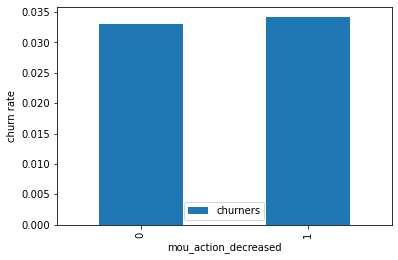

In [96]:
data.pivot_table(values='churners', index='mou_action_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:

The churn rate is more for the customers whose minutes of usage decreased in the action phase than the good phase

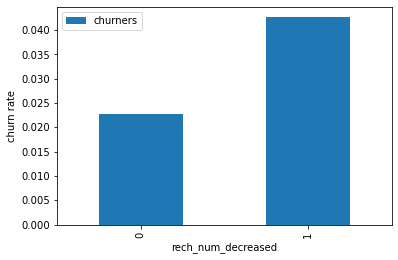

In [97]:
data.pivot_table(values='churners', index='rech_num_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:

The churn rate is more for the customers whose number of recharge in the action phase is lesser than the number in good phase
 

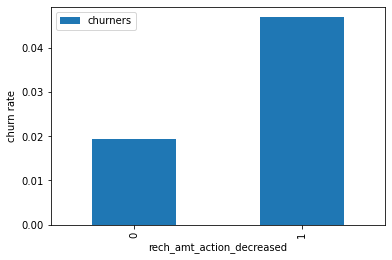

In [98]:
data.pivot_table(values='churners', index='rech_amt_action_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:
The churn rate is more for the customers whose amount of recharge in the action phase is lesser than the amount in good phase

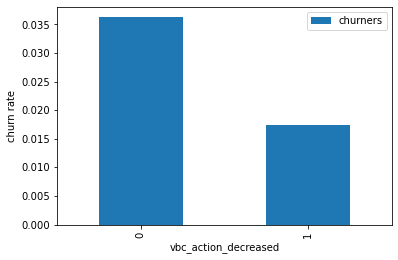

In [99]:
data.pivot_table(values='churners', index='vbc_action_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:

The churn rate is more than for the customers whose volumn based cost in action month is increased.That means in action phase customers do not do more monthly recharges.

In [100]:
# Creating churn dataframe

data_churners = data[data['churners']==1]

#Creating non-churn dataframe

data_non_churners= data[data['churners']==0]

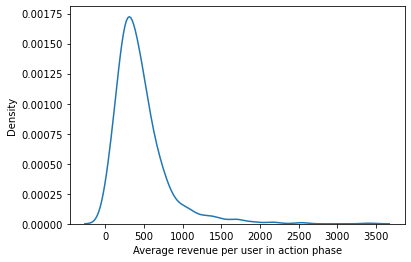

In [101]:
#Distribution plot 

ax = sns.distplot(data_churners['arpu_action_avg'], label='churn',hist= False)
ax.set(xlabel='Average revenue per user in action phase')
plt.show()

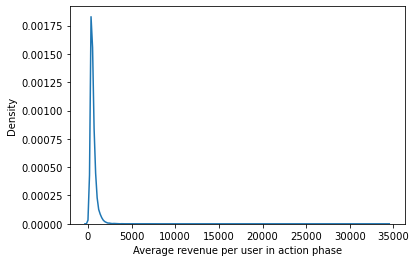

In [102]:


ax = sns.distplot(data_non_churners['arpu_action_avg'], label='non churn', hist=False)
ax.set(xlabel='Average revenue per user in action phase')
plt.show()

# Insight:

Average revenue per user for the churned customers is mostly densed between o to 900.Th
Average revenue per user for the non churned customers is mostly densed between 0 to 1000.
The higher ARPU customers are less likely to be churned.

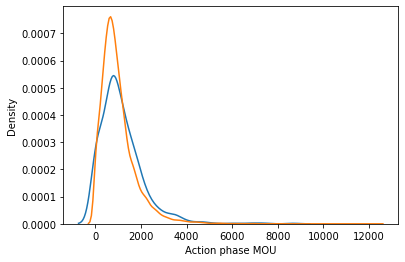

In [103]:
# Minutes of usage(MOU) in the action phase for churn and non churn customers

ax = sns.distplot(data_churners['mou_good_phase'],label='churn',hist=False)
ax = sns.distplot(data_non_churners['mou_good_phase'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')
plt.show()

# Insight:
MOU of the churn customers is mostly populated between 0 to 2500 range.
Higher Mou customers are less likely to churn

# BIVARIATE ANALYSIS

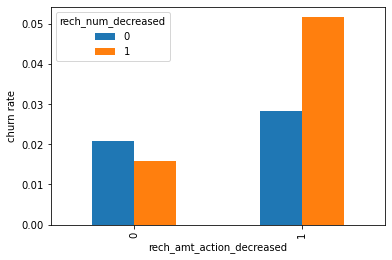

In [104]:

# Analysis of churn rate by the decreasing number of recharge and recharge amount in the action phase

data.pivot_table(values='churners', index='rech_amt_action_decreased', columns='rech_num_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:

The churn rate is more for the customers whose number of recharge and amount of recharge have decreased in the action phase than the good phase.

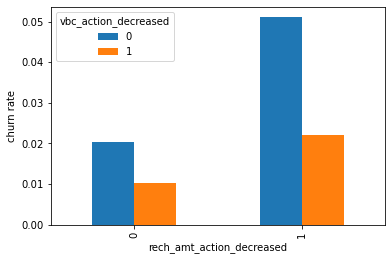

In [105]:
#Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase



data.pivot_table(values='churners', index='rech_amt_action_decreased', columns='vbc_action_decreased', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Insight:
The churn rate is more for the customers whose recharge amount is decreased along with the volume based cost is increased in the action phase.


In [106]:
# Dropping few derived columns which are not required in further analysis

data = data.drop(['mou_good_phase', 'avg_mou_action','diff_mou', 'rech_num_action_avg', 'diff_rech_num', 'avg_rech_amt_action', 'diff_rech_amt' , 'arpu_action_avg', 'diff_arpu', 'avg_vbc_3g_action','diff_vbc','avg_recharge_amount'],axis=1)

In [107]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churners,mou_action_decreased,rech_num_decreased,rech_amt_action_decreased,arpu_action_decreased,vbc_action_decreased
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.0,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.0,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,1,1,1,1,0
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.0,0.0,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.0,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.0,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0,1,0,1,1,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.00,0.00,3.26,5.91,0.00,0.0,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.0,2.18,0.0,0.0,0.0,87.99,151.73,82.44,364.86,381.56,294.4

# DATA PREPARATION FOR MODEL BUILDING


In [108]:
# Train-test split

#Importing required libraries

from sklearn.model_selection import train_test_split

In [109]:
# Putting feature variables into x

x=data.drop(['mobile_number','churners'],axis=1)

In [110]:
# Putting target variable to y

y= data['churners']

In [111]:
# Splitting data into train and test set at 70:30 ratio

x_train,X_test,y_train,y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

In [112]:
# Using Synthetic minority oversampling technique (SMOTE) to handle data imbalance

#Importing SMOTE



In [113]:
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sraba\\AppData\\Local\\Temp\\pip-install-lq1mb0mb\\scikit-learn_e44242121df14ef2898d7e0d088b7b6c\\setup.py'"'"'; __file__='"'"'C:\\Users\\sraba\\AppData\\Local\\Temp\\pip-install-lq1mb0mb\\scikit-learn_e44242121df14ef2898d7e0d088b7b6c\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\sraba\AppData\Local\Temp\pip-wheel-k9kzg5fe'
       cwd: C:\Users\sraba\AppData\Local\Temp\pip-install-lq1mb0mb\scikit-learn_e44242121df14ef2898d7e0d088b7b6c\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompi


  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'


In [114]:
from imblearn.over_sampling import SMOTE

In [115]:
sm=SMOTE(random_state=27)

In [116]:
x_train,y_train = sm.fit_sample(x_train,y_train)

# FEATURE SCALING

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [118]:
# List of numeric colums 

scale_col= x_train.columns.to_list()

# Deleting the derived binary columns

scale_col.remove('mou_action_decreased')
scale_col.remove('rech_num_decreased')
scale_col.remove('rech_amt_action_decreased')
scale_col.remove('arpu_action_decreased')
scale_col.remove('vbc_action_decreased')

In [119]:
# Fit the data into scaler and transform

x_train[scale_col] = scaler.fit_transform(x_train[scale_col])
x_train.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,mou_action_decreased,rech_num_decreased,rech_amt_action_decreased,arpu_action_decreased,vbc_action_decreased
0,0.0,0.0,0.0,0.0,-0.922477,-0.130069,-0.477289,-0.701985,-0.648679,-0.536473,-0.928020,-0.893531,-0.727216,-0.262516,-0.253069,-0.291357,-0.307361,-0.353804,-0.356667,-0.377140,-0.328798,-0.300594,-0.647739,-0.636436,-0.539290,-0.274908,-0.260821,-0.247342,-0.194024,-0.251475,-0.224908,-0.663661,-0.622176,-0.536860,-0.562077,-0.517706,-0.400419,-0.626161,-0.583523,-0.433251,-0.153463,-0.136531,-0.124535,0.0,0.0,0.0,-0.837504,-0.765114,-0.554890,-0.036064,-0.034791,-0.030890,-0.322272,-0.332227,-0.252587,-0.301818,-0.015186,-0.023611,-1.098153,-1.003740,-0.747781,-0.386985,-0.367793,-0.209214,-0.535428,-0.527828,-0.414535,-0.294776,-0.271252,-0.238259,-0.608687,-0.589598,-0.420808,-0.211912,-0.184967,-0.198762,-0.360037,-0.314753,-0.248385,-0.129376,0.008187,-0.10042,0.0,0.0,0.0,-0.385972,-0.326459,-0.302537,-0.710050,-0.659536,-0.489680,-0.360793,-0.123286,-0.198032,-0.149676,-0.148456,-0.119333,-0.026765,-0.055214,-0.070813,-1.041836,-0.782706,-0.805311,-0.897891,-0.128544,-0.426039,0.590566,0.558235,0.735856,1.112311,1.257036,1.271770,-0.245300,0.580458,1.040935,1.321914,2.810892,1.742542,-0.251697,-0.245963,-0.230891,-0.249887,-0.266399,-0.263313,2.089232,3.924903,2.035905,-0.128287,-0.132882,-0.116121,1.037121,5.278376,6.177970,-0.260322,1,0,0,0,0
1,0.0,0.0,0.0,0.0,-0.133175,0.009051,-0.017247,-0.400157,-0.518087,-0.315833,-0.171570,-0.428752,0.214088,-0.262516,-0.253069,-0.215838,-0.307361,-0.353804,-0.243200,0.527946,0.024312,0.221152,1.252830,0.438338,1.116969,-0.111249,0.947907,1.488384,-0.194024,-0.251475,1.993507,1.125733,0.340472,0.921496,-0.562077,-0.516994,-0.400419,-0.626161,-0.583523,-0.425331,-0.153463,-0.136531,-0.124535,0.0,0.0,0.0,-0.837504,-0.764578,-0.550054,-0.036064,-0.034791,-0.030890,-0.282554,-0.166238,0.512545,0.300278,-0.015186,-0.023611,-0.352278,-0.596108,-0.023415,-0.063380,0.127799,0.418805,1.183785,0.537817,1.062256,-0.227274,0.206880,-0.018277,0.781826,0.467454,0.939102,-0.211912,-0.20

In [120]:
# Transforming the test set

X_test[scale_col]=scaler.transform(X_test[scale_col])
X_test.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,mou_action_decreased,rech_num_decreased,rech_amt_action_decreased,arpu_action_decreased,vbc_action_decreased
7634,0.0,0.0,0.0,0.0,-0.346350,-0.817248,-0.721118,-0.642726,-0.608211,-0.512932,-0.195138,-0.473590,-0.293739,-0.262516,-0.253069,-0.280888,-0.307361,-0.353804,-0.350689,-0.267022,-0.241206,-0.276166,0.462618,0.130373,-0.127648,-0.187384,-0.260821,-0.151053,-0.194024,-0.183241,-0.224908,0.126752,-0.090269,-0.255692,-0.538437,-0.508006,-0.385154,-0.318574,-0.460838,-0.157982,-0.153463,-0.136531,-0.124535,0.0,0.0,0.0,-0.617286,-0.679363,-0.375829,-0.036064,-0.034791,-0.03089,-0.228292,0.076042,-0.252587,0.359129,-0.015186,-0.023611,-0.552131,-0.687499,-0.458108,0.282230,-0.137378,-0.343138,0.131779,0.221180,-0.327562,-0.053040,-0.203898,-0.061803,0.221108,0.055661,-0.398140,-0.199412,-0.148182,-0.185248,-0.325213,-0.282830,-0.248385,-0.105360,-0.099647,-0.100420,0.0,0.0,0.0,-0.352645,-0.295376,-0.295987,-0.011148,-0.121793,-0.468294,-0.360793,-0.123286,-0.198032,-0.149676,-0.148456,-0.119333,-0.079834,-0.09045,-0.070813,-0.606446,-0.667998,-0.436262,-0.317626,-0.897811,-0.698090,-0.276093,-0.282667,-0.203395,0.083791,-0.726833,-0.523703,-0.245300,-0.238260,-0.201947,-0.251819,-0.244634,-0.236848,-0.251697,-0.245963,-0.230891,-0.249887,-0.266399,-0.263313,-0.225128,-0.21658,-0.215627,-0.128287,-0.132882,-0.116121,0.189088,-0.255944,-0.257937,-0.260322,1,1,1,1,0
40466,0.0,0.0,0.0,0.0,-0.687188,-0.477290,0.150044,-0.288288,-0.219296,0.351798,-0.694597,-0.638867,-0.369851,0.913983,0.888516,0.449437,1.817273,1.937935,0.596298,-0.377140,-0.334827,-0.218114,-0.647739,-0.636958,-0.508006,-0.274908,-0.260821,-0.247342,-0.194024,-0.251475,-0.224908,-0.663661,-0.626409,-0.467195,-0.562077,-0.517706,0.307446,-0.626161,-0.583523,-0.207368,-0.153463,-0.136531,-0.124535,0.0,0.0,0.0,-0.837504,-0.765114,0.092904,-0.036064,-0.034791,-0.03089,-0.322272,-0.332227,-0.102011,-0.301818,-0.015186,-0.023611,-1.098153,-1.005509,-0.147513,-0.444025,-0.400950,-0.220893,-0.663040,-0.632721,-0.389903,-0.294776,-0.281785,-0.247964,-0.726982,-0.680605,

In [121]:
# Principle Components Analysis

from sklearn.decomposition import PCA
    

In [122]:
PCA = PCA(random_state=42)

PCA.fit(x_train)

PCA(random_state=42)

In [123]:
PCA.components_

array([[-4.67650021e-20,  5.55111512e-17, -2.77555756e-17, ...,
        -2.33400699e-02, -2.28420041e-02,  1.33911952e-02],
       [-4.56092340e-19,  0.00000000e+00,  4.44089210e-16, ...,
        -4.61725184e-03, -4.41721174e-03, -1.31040173e-02],
       [ 8.83876632e-19,  2.77555756e-16, -5.55111512e-17, ...,
        -1.17409867e-02, -1.72716773e-02,  1.69605520e-02],
       ...,
       [ 0.00000000e+00, -1.78396809e-01,  7.95171534e-01, ...,
        -1.73472348e-16, -1.11022302e-16,  0.00000000e+00],
       [-0.00000000e+00, -4.28012000e-01, -9.12617146e-02, ...,
         1.80411242e-16, -2.01227923e-16, -6.50521303e-18],
       [ 9.99999787e-01,  3.70107746e-04, -1.50317647e-05, ...,
         1.61613886e-18,  2.24633138e-18, -1.41352858e-17]])

In [124]:
# Finding cumulative variance of PCA

variance_pc= np.cumsum(PCA.explained_variance_ratio_)
print(variance_pc)

[0.11048485 0.19328732 0.2521987  0.29647902 0.33975708 0.37669965
 0.40875969 0.43824544 0.46593987 0.4914129  0.51649059 0.53874893
 0.56063798 0.58181387 0.60131212 0.61941175 0.63587844 0.65197263
 0.6669846  0.6805578  0.6935829  0.70632619 0.71838163 0.73032491
 0.74181199 0.75228047 0.76174786 0.77108302 0.78004179 0.78877329
 0.79677824 0.80445512 0.81195123 0.81910204 0.82583543 0.8324875
 0.83893204 0.84497986 0.85082451 0.85653687 0.86193714 0.86732587
 0.87250494 0.87729367 0.88189567 0.88631854 0.89055296 0.89476677
 0.89892968 0.90294164 0.90683809 0.91053966 0.91414866 0.91768871
 0.92113012 0.9243703  0.92750644 0.93042212 0.9332998  0.93607693
 0.93880057 0.94149639 0.94408168 0.94664837 0.94920267 0.95171721
 0.9541557  0.95651661 0.95875244 0.96090525 0.96301363 0.96509134
 0.96700063 0.96889192 0.97073257 0.97247704 0.97421468 0.97589099
 0.97751997 0.97913191 0.98070326 0.98223016 0.98368318 0.98510004
 0.98642421 0.9876928  0.98889496 0.98998148 0.99104342 0.99205

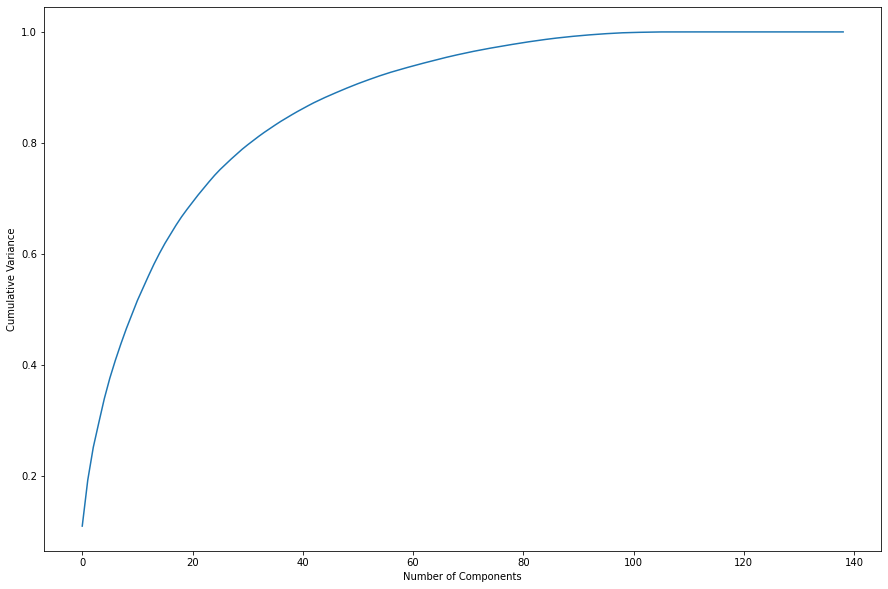

In [125]:
# Plotting cumulative variance and number of components


fig = plt.figure(figsize = (15,10))
plt.plot(variance_pc)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

# Insight:

More than 90% variance of the data is captured by 60 components.
Will take 60 components to perform PCA

In [126]:
# Importing required libraries

from sklearn.decomposition import IncrementalPCA

PCA_final = IncrementalPCA(n_components=60)

In [127]:
x_train_PCA = PCA_final.fit_transform(x_train)

In [128]:
# Transforming test set

X_test_PCA=PCA_final.transform(X_test)

# BUILDING LOGISTIC REGRESSION MODEL WITH PCA

In [129]:
# importing required liraries

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix

In [130]:
# Tuning hyperparameter C
#C is the inverse of regularization strength



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [131]:
# Creating K fold object with 5 splits

folds = KFold(n_splits = 5, shuffle=True, random_state=4)

#Specify params

params ={'C': [0.01,0.1,1,10,100,1000]}


# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(x_train_PCA, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [132]:
# results of grid search CV
gridsearch_cv_results = pd.DataFrame(model_cv.cv_results_)
gridsearch_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.322542,0.018573,0.008431,0.004968,0.01,{'C': 0.01},0.905080,0.898359,0.908242,0.895270,0.889151,0.899221,0.006833,6,0.900402,0.900284,0.898366,0.900550,0.899239,0.899768,0.000839
1,0.531546,0.030214,0.005205,0.002629,0.1,{'C': 0.1},0.905615,0.899682,0.909309,0.895530,0.892034,0.900434,0.006337,5,0.900731,0.902000,0.900277,0.900948,0.899901,0.900771,0.000713
2,0.652658,0.049496,0.011051,0.006541,1,{'C': 1},0.905615,0.899947,0.910109,0.897089,0.891509,0.900854,0.006491,4,0.900336,0.902264,0.900540,0.901014,0.900232,0.900877,0.000744
3,0.614345,0.086485,0.008545,0.005446,10,{'C': 10},0.906150,0.899947,0.909843,0.897089,0.891509,0.900908,0.006498,1,0.900270,0.902462,0.900343,0.901081,0.900364,0.900904,0.000833
4,0.604218,0.049613,0.013360,0.003653,100,{'C': 100},0.906150,0.899947,0.909843,0.897089,0.891509,0.900908,0.006498,1,0.900270,0.902462,0.900277,0.901081,0.900430,0.900904,0.000834
5,0.626825,0.068689,0.003125,0.006250,1000,{'C': 1000},0.906150,0.899947,0.909843,0.897089,0.891509,0.900908,0.006498,1,0.900270,0.902330,0.900343,0.901213,0.900430,0.900917,0.000783


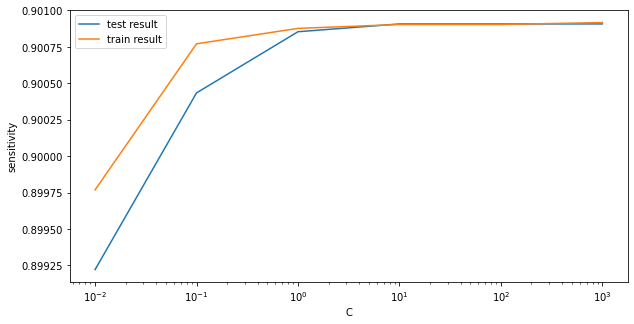

In [133]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(gridsearch_cv_results['param_C'], gridsearch_cv_results['mean_test_score'])
plt.plot(gridsearch_cv_results['param_C'], gridsearch_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')
plt.show()

In [134]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9009076500618871 at C = 10


# Logistic regression with optimal C

In [135]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(x_train_PCA, y_train)


# Predictions on the train set
y_train_pred = log_pca_model.predict(x_train_PCA)

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[15967  2964]
 [ 1876 17055]]


In [136]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [137]:
# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity: ",TP / float(TP+FN))

# Specificity
print("Specificity: ", TN / float(TN+FP))

Accuracy:  0.8721673445671121
Sensitivity:  0.9009032803338439
Specificity:  0.8434314088003804


# Prediction on the test set

In [138]:
y_test_pred = log_pca_model.predict(X_test_PCA)

# Confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[6848 1263]
 [  65  222]]


In [139]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8418671112169565
Sensitivity:- 0.7735191637630662
Specificity:- 0.844285538158057


# Model Performance

Train set:

Accuracy = 0.87 ,
Sensitivity = 0.90 ,
Specificity = 0.84

Test set:

Accuracy = 0.84 ,
Sensitivity = 0.77 ,
Specificity = 0.84


Model works well on train set but sensitivity drops on test set.

# Decision Tree with PCA

In [141]:
from sklearn.tree import DecisionTreeClassifier

# 
Hyperparameter tuning

In [142]:
#Creating parameter grid

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = decision_tree, 
                           param_grid = param_grid , 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_PCA,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [143]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.087538,0.072764,0.011003,0.003677,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.780243,0.820174,0.810618,0.817750,0.830956,0.811948,0.017144,5
1,3.108513,0.141384,0.011757,0.005538,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.780243,0.820174,0.810618,0.817750,0.830956,0.811948,0.017144,5
2,3.107866,0.057249,0.015289,0.000669,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.773111,0.814101,0.793714,0.815108,0.830692,0.805345,0.019944,7
3,3.134750,0.049723,0.015886,0.001526,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.773111,0.814101,0.793714,0.815108,0.830692,0.805345,0.019944,7
4,5.200958,0.212459,0.013840,0.002328,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.894876,0.910747,0.904385,0.903328,0.902800,0.903227,0.005056,2
5,4.505986,0.157194,0.011719,0.004470,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.894876,0.912332,0.904385,0.903328,0.902800,0.903544,0.005544,1
6,4.460859,0.496447,0.005060,0.006253,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.856313,0.879588,0.882990,0.895932,0.894876,0.881940,0.014328,3
7,4.483765,0.254028,0.012717,0.003851,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.856313,0.879588,0.882990,0.895932,0.894876,0.881940,0.014328,3


In [144]:
# Finding optimal sensitivity score and hyperparameters

print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.903543986705708
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


# 
Model with optimal hyperparameters

In [145]:
dtree_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dtree_pca_model.fit(x_train_PCA, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

# 
Prediction on the train set


In [146]:
y_train_pred = dtree_pca_model.predict(x_train_PCA)

In [147]:
confusion_matrix= metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[16502  2429]
 [ 1426 17505]]


In [148]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [149]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8981828746500449
Sensitivity:- 0.9246738154350008
Specificity:- 0.871691933865089


# 
Prediction on the test set

In [150]:
y_test_pred = dtree_pca_model.predict(X_test_PCA)


confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[6939 1172]
 [ 100  187]]


In [151]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8485353655632294
Sensitivity:- 0.6515679442508711
Specificity:- 0.8555048699297251


# 
Model Performance

Train set:
    
Accuracy = 0.89 ,
Sensitivity = 0.92 ,
Specificity = 0.87

Test set:
    
Accuracy = 0.84 ,
Sensitivity = 0.65 ,
Specificity = 0.85

Model works well on the train set while sensitivity has been desreased on the test set.

# Random Forest with PCA

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [154]:
#Hyperparameter tuning

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}



In [155]:
# Creating a based model

random_forest = RandomForestClassifier()


In [156]:
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = random_forest, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)


In [157]:
# Fit the model

grid_search.fit(x_train_PCA, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [158]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.852781428649699 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [159]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [162]:
rfc_model.fit(x_train_PCA, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [163]:
# Predictions on the train set

y_train_pred = rfc_model.predict(x_train_PCA)

In [164]:
# Confusion matrix

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[15873  3058]
 [ 2328 16603]]


In [165]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives 

In [166]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8577465532724103
Sensitivity:- 0.8770270984100154
Specificity:- 0.8384660081348053


# 
Prediction on test set

In [167]:
# Prediction on the test set

y_test_pred = rfc_model.predict(X_test_PCA)

In [168]:
# Confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[6826 1285]
 [  83  204]]


In [169]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [170]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8371040723981901
Sensitivity:- 0.710801393728223
Specificity:- 0.8415731722352361


# 
Model performance

Train set:
    
Accuracy = 0.85
Sensitivity = 0.87
Specificity = 0.83

Test set:
    
Accuracy = 0.83
Sensitivity = 0.71
Specificity = 0.84

The Sesitivity has been decreased while evaluating the model on the test set

# 
Insight:

After building different models with PCA logistic regression model works well on test set with sensitivity 0f 77% and accuracy of 84%.
Here we are focusing more on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases.
The main goal is to reatin the customers, who have the possiblity to churn. 
Hence, the sensitivity score is more important here.

# Logistic regression model building with no PCA

In [171]:
# Importing required libraries

import statsmodels.api as sm

In [172]:
# Instantiate the model
# Adding the constant to X_train
log_without_pca = sm.GLM(y_train,(sm.add_constant(x_train)), family=sm.families.Binomial())

In [173]:
# Fit the model

log_without_pca = log_without_pca.fit().summary()

In [174]:
log_without_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               churners   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37732
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 May 2023   Deviance:                       21131.
Time:                        11:20:05   Pearson chi2:                 1.13e+07
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      -300.3476   8140.750     -0.037      0.971   -1.63e+04    1.57e+04
circle_id                  4.206e-06      0.000      0.036      0.971      -0.000       0.000
loc_og_t2o_mou              1.23e-06    3.3e-05      0.037      0.970   -6.34e-05    6.58e-05
std_og_t2o_mou             3.381e-06   9.23e-05      0.037      0.971      -0.000       0.000
loc_ic_t2o_mou            -7.182e-06      0.000     -0.038      0.970      -0.000       0.000
arpu_6                        0.3199      0.106      3.011      0.003       0.112       0.528
arpu_7                       -0.1667      0.111     -1.504      0.133      -0.384       0.050
arpu_8                       -0.2051      0.131     -1.562      0.118      -0.462       0.052
onnet_mou_6                   3.7253      3.746      0.994      0.320      -3.617      11.068
onnet_mou_7                   0.5876      2.229      0.264      0.792      -3.780       4.956
onnet_mou_8                  -0.9037      2.266     -0.399      0.690      -5.345       3.538
offnet_mou_6                  2.4852      3.338      0.744      0.457      -4.058       9.028
offnet_mou_7                  3.7851      1.883      2.011      0.044       0.095       7.475
offnet_mou_8                 -3.4453      2.028     -1.699      0.089      -7.420       0.529
roam_ic_mou_6                 0.3876      0.046      8.466      0.000       0.298       0.477
roam_ic_mou_7                 0.0201      0.062      0.325      0.745      -0.101       0.141
roam_ic_mou_8                 0.1270      0.053      2.392      0.017       0.023       0.231
roam_og_mou_6                -1.3095      1.101     -1.190      0.234      -3.467       0.848
roam_og_mou_7                -0.7464      0.625     -1.194      0.233      -1.972       0.479
roam_og_mou_8                 1.6741      0.848      1.974      0.048       0.012       3.336
loc_og_t2t_mou_6          -1063.1921    685.093     -1.552      0.121   -2405.949     279.565
loc_og_t2t_mou_7           -844.5556    727.563     -1.161      0.246   -2270.552     581.441
loc_og_t2t_mou_8           5853.1496    703.871      8.316      0.000    4473.588    7232.711
loc_og_t2m_mou_6          -1131.2639    729.063     -1.552      0.121   -2560.202     297.674
loc_og_t2m_mou_7           -808.8554    695.089     -1.164      0.245   -2171.205     553.495
loc_og_t2m_mou_8           6157.5406    740.315      8.317      0.000    4706.550    7608.532
loc_og_t2f_mou_6            -95.8372     61.873     -1.549      0.121    -217.106      25.431
loc_og_t2f_mou_7            -73.2089     62.925     -1.163      0.245    -196.539      50.121
loc_og_t2f_mou_8            515.2071     61.959      8.315      0.000     393.770     636.644
loc_og_t2c_mou_6              0.0499      0.024      2.066      0.039      

# 
Insight:
We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.


Hence we will first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination

In [175]:
# RFE for feature selection

In [213]:
# Importing logistic regression from sklearn


from sklearn.linear_model import LogisticRegression

# Intantiate the logistic regression

logreg = LogisticRegression()

In [214]:
# Importing RFE

from sklearn.feature_selection import RFE





In [254]:
rfe = RFE(logreg, n_features_to_select = 15)

In [255]:
# Fit the rfe model with train set

rfe = rfe.fit(x_train, y_train)

In [256]:
# RFE selected columns

rfe_cols = x_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'arpu_8', 'onnet_mou_8', 'offnet_mou_6', 'roam_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'monthly_2g_8',
       'arpu_action_decreased', 'vbc_action_decreased'],
      dtype='object')


In [257]:
#MODEL 1 with RFE selected columns


x_train_sm_1 = sm.add_constant(x_train[rfe_cols])

#Instantiate the model

log_without_pca_1 = sm.GLM(y_train, x_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_without_pca_1 = log_without_pca_1.fit()

log_without_pca_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               churners   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37846
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 May 2023   Deviance:                       27572.
Time:                        18:45:05   Pearson chi2:                 3.16e+08
No. Iterations:                    34   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -32.0506   6918.047     -0.005      0.996   -1.36e+04    1.35e+04
arpu_6                    0.9752      0.036     27.318      0.000       0.905       1.045
arpu_8                   -1.8363      0.054    -33.951      0.000      -1.942      -1.730
onnet_mou_8               2.5258      0.108     23.483      0.000       2.315       2.737
offnet_mou_6             -0.8957      0.068    -13.264      0.000      -1.028      -0.763
roam_og_mou_8             1.2430      0.048     25.969      0.000       1.149       1.337
std_og_t2m_mou_6          1.1012      0.065     17.045      0.000       0.975       1.228
std_og_t2m_mou_8          1.7091      0.084     20.346      0.000       1.544       1.874
og_others_8           -1358.0592   2.93e+05     -0.005      0.996   -5.76e+05    5.73e+05
total_og_mou_8           -3.3667      0.157    -21.379      0.000      -3.675      -3.058
loc_ic_t2t_mou_8         -1.3089      0.066    -19.972      0.000      -1.437      -1.180
loc_ic_t2f_mou_8         -1.0994      0.068    -16.149      0.000      -1.233      -0.966
ic_others_8              -2.2434      0.208    -10.770      0.000      -2.652      -1.835
monthly_2g_8             -1.0188      0.065    -15.660      0.000      -1.146      -0.891
arpu_action_decreased    -1.1991      0.042    -28.441      0.000      -1.282      -1.116
vbc_action_decreased     -1.5177      0.073    -20.835      0.000      -1.660      -1.375
=========================================================================================
"""

In [258]:
# Calculating VIF values of feature variables:


from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
pd.set_option('display.max_rows', 100)
vif = pd.DataFrame()
vif['Features'] = x_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[rfe_cols].values, i) for i in range(x_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_og_mou_8,24.38
2,onnet_mou_8,12.41
3,offnet_mou_6,11.87
5,std_og_t2m_mou_6,10.55
6,std_og_t2m_mou_8,7.59
1,arpu_8,3.43
0,arpu_6,2.56
4,roam_og_mou_8,2.47
13,arpu_action_decreased,1.28
14,vbc_action_decreased,1.12


In [260]:
# Removing features whose vif>5

log_cols = rfe_cols.to_list()
log_cols.remove('total_og_mou_8')
log_cols.remove('onnet_mou_8')
log_cols.remove('offnet_mou_6')
log_cols.remove('std_og_t2m_mou_6')
log_cols.remove('std_og_t2m_mou_8')

print(log_cols)

['arpu_6', 'arpu_8', 'roam_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'ic_others_8', 'monthly_2g_8', 'arpu_action_decreased', 'vbc_action_decreased']


# Model-2

In [261]:
# Adding constant to X_train

x_train_sm_2 = sm.add_constant(x_train[log_cols])

#Instantiate the model

log_without_pca_2 = sm.GLM(y_train, x_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_without_pca_2 = log_without_pca_2.fit()

log_without_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               churners   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37851
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 May 2023   Deviance:                       29675.
Time:                        18:58:50   Pearson chi2:                 4.44e+07
No. Iterations:                    34   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -32.7536   6945.398     -0.005      0.996   -1.36e+04    1.36e+04
arpu_6                    0.9970      0.029     34.822      0.000       0.941       1.053
arpu_8                   -2.0116      0.036    -55.522      0.000      -2.083      -1.941
roam_og_mou_8             1.6180      0.037     43.965      0.000       1.546       1.690
og_others_8           -1388.0894   2.94e+05     -0.005      0.996   -5.78e+05    5.75e+05
loc_ic_t2t_mou_8         -2.0705      0.067    -30.912      0.000      -2.202      -1.939
loc_ic_t2f_mou_8         -1.7179      0.073    -23.647      0.000      -1.860      -1.576
ic_others_8              -2.7167      0.214    -12.666      0.000      -3.137      -2.296
monthly_2g_8             -1.0742      0.067    -16.044      0.000      -1.205      -0.943
arpu_action_decreased    -1.1597      0.040    -28.801      0.000      -1.239      -1.081
vbc_action_decreased     -1.6105      0.070    -22.927      0.000      -1.748      -1.473
=========================================================================================
"""

In [262]:
# Calculating vif for model2

pd.set_option('display.max_rows', 100)
vif = pd.DataFrame()
vif['Features'] = x_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[log_cols].values, i) for i in range(x_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,1.81
0,arpu_6,1.65
8,arpu_action_decreased,1.28
2,roam_og_mou_8,1.13
9,vbc_action_decreased,1.11
4,loc_ic_t2t_mou_8,1.07
5,loc_ic_t2f_mou_8,1.05
7,monthly_2g_8,1.05
6,ic_others_8,1.01
3,og_others_8,1.00


# Insight: 
We can see VIFs of all features are below 5 so will remobve features based on p-value
Removing og_others_8 column since it has highest p-value of 0.99



In [296]:
log_cols.remove('og_others_8')

In [297]:
# Adding constant to X_train

x_train_sm_3 = sm.add_constant(x_train[log_cols])

#Instantiate the model

log_without_pca_3 = sm.GLM(y_train, x_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_without_pca_3 = log_without_pca_3.fit()

log_without_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               churners   No. Observations:                37862
Model:                            GLM   Df Residuals:                    37852
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14877.
Date:                Sun, 07 May 2023   Deviance:                       29754.
Time:                        19:42:41   Pearson chi2:                 4.29e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4514
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0074      0.036      0.204      0.838      -0.064       0.079
arpu_6                    0.9945      0.029     34.879      0.000       0.939       1.050
arpu_8                   -2.0106      0.036    -55.561      0.000      -2.082      -1.940
roam_og_mou_8             1.6159      0.037     44.027      0.000       1.544       1.688
loc_ic_t2t_mou_8         -2.0704      0.067    -30.933      0.000      -2.202      -1.939
loc_ic_t2f_mou_8         -1.7204      0.073    -23.675      0.000      -1.863      -1.578
ic_others_8              -2.7331      0.215    -12.730      0.000      -3.154      -2.312
monthly_2g_8             -1.0893      0.069    -15.890      0.000      -1.224      -0.955
arpu_action_decreased    -1.1557      0.040    -28.757      0.000      -1.234      -1.077
vbc_action_decreased     -1.6089      0.070    -22.925      0.000      -1.747      -1.471
=========================================================================================
"""

In [298]:
# Checking vif of model-3

vif = pd.DataFrame()
vif['Features'] = x_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[log_cols].values, i) for i in range(x_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,1.81
0,arpu_6,1.65
7,arpu_action_decreased,1.28
2,roam_og_mou_8,1.13
8,vbc_action_decreased,1.11
3,loc_ic_t2t_mou_8,1.07
4,loc_ic_t2f_mou_8,1.05
6,monthly_2g_8,1.05
5,ic_others_8,1.01


# Insight:
Vifs of all the variables are below 5 hence there is no multicollinearity among the variables.
so model 3 is the final model

In [299]:
# Model performance on the train set
# Getting the predicted value on the train set

y_train_pred_without_pca = log_without_pca_3.predict(x_train_sm_3)
y_train_pred_without_pca.head()



0    6.816671e-01
1    1.161238e-01
2    3.557585e-01
3    1.534602e-02
4    1.591318e-07
dtype: float64

In [300]:
#Creating dataframe with actual churn and the predicted churn

y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_pred':y_train_pred_without_pca.values})

#Assigning Customer ID 

#CustID is the index of each record.

y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_pred,CustID
0,0,6.816671e-01,0
1,0,1.161238e-01,1
2,0,3.557585e-01,2
3,0,1.534602e-02,3
4,0,1.591318e-07,4


In [301]:
#Finding Optimal Probablity Cutoff Point
# Creating columns for different probablity cutoffs

prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_pred'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_pred,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,6.816671e-01,0,1,1,1,1,1,1,1,0,0,0
1,0,1.161238e-01,1,1,1,0,0,0,0,0,0,0,0
2,0,3.557585e-01,2,1,1,1,1,0,0,0,0,0,0
3,0,1.534602e-02,3,1,0,0,0,0,0,0,0,0,0
4,0,1.591318e-07,4,1,0,0,0,0,0,0,0,0,0


In [302]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.709973     0.982885     0.437061
0.2          0.2  0.760499     0.970789     0.550209
0.3          0.3  0.799509     0.947810     0.651207
0.4          0.4  0.826132     0.912683     0.739581
0.5          0.5  0.842111     0.867096     0.817125
0.6          0.6  0.843828     0.809783     0.877872
0.7          0.7  0.825551     0.728646     0.922455
0.8          0.8  0.753869     0.552955     0.954783
0.9          0.9  0.623105     0.266653     0.979557


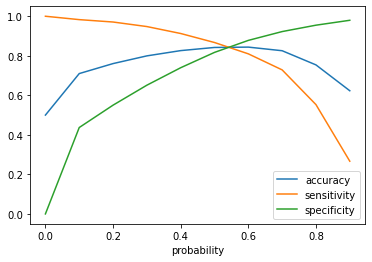

In [303]:
# Plotting accuracy, sensitivity and specificity for different probabilities.

cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

# 
At point 0.5 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

In [304]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 

y_train_pred_final['predicted'] = y_train_pred_final['churn_pred'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_pred,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,6.816671e-01,0,1,1,1,1,1,1,1,0,0,0,1
1,0,1.161238e-01,1,1,1,0,0,0,0,0,0,0,0,0
2,0,3.557585e-01,2,1,1,1,1,0,0,0,0,0,0,0
3,0,1.534602e-02,3,1,0,0,0,0,0,0,0,0,0,0
4,0,1.591318e-07,4,1,0,0,0,0,0,0,0,0,0,0


In [305]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion_matrix)

[[15469  3462]
 [ 2516 16415]]


In [306]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [307]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8421108235169827
Sensitivity:- 0.8670962970788654
Specificity:- 0.8171253499551001


In [308]:
# ROC Curve:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

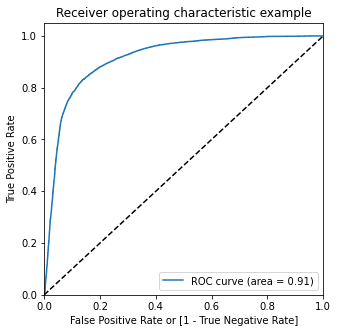

In [309]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_pred'])

#
We can see the area of ROC curve is closer to 1

# Testing the model on test set

In [310]:
# Taking a copy of the test set

X_test_log = X_test.copy()

In [311]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [312]:
# Adding constant on the test set

X_test_sm = sm.add_constant(X_test_log)

In [313]:
# Predict on the test set
y_test_pred = log_without_pca_3.predict(X_test_sm)

In [314]:
y_test_pred.head()

7634     0.657531
40466    0.258197
53854    0.011686
95060    0.016029
92802    0.386237
dtype: float64

In [315]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7634,0.657531
40466,0.258197
53854,0.011686
95060,0.016029
92802,0.386237


In [316]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churners
7634,0
40466,0
53854,0
95060,0
92802,0


In [317]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [318]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [319]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [320]:
y_test_pred_final.head()

,churners,CustID,0
0,0,7634,0.657531
1,0,40466,0.258197
2,0,53854,0.011686
3,0,95060,0.016029
4,0,92802,0.386237


In [321]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_pred'})

In [322]:
y_test_pred_final.head()

,churners,CustID,churn_pred
0,0,7634,0.657531
1,0,40466,0.258197
2,0,53854,0.011686
3,0,95060,0.016029
4,0,92802,0.386237


In [323]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_pred'].map(lambda x: 1 if x > 0.5 else 0)

In [324]:
y_test_pred_final.head()

,churners,CustID,churn_pred,test_predicted
0,0,7634,0.657531,1
1,0,40466,0.258197,0
2,0,53854,0.011686,0
3,0,95060,0.016029,0
4,0,92802,0.386237,0


In [325]:
# Confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test_pred_final['churners'], y_test_pred_final['test_predicted'])
print(confusion_matrix)

[[6648 1463]
 [  63  224]]


In [326]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [327]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churners'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8182900690640629
Sensitivity:- 0.7804878048780488
Specificity:- 0.8196276661324128


# 
Model Performance

Train set:
    
Accuracy = 0.84 ,
Sensitivity = 0.86 ,
Specificity = 0.81

Test set:
    
Accuracy = 0.81 ,
Sensitivity = 0.78 ,
Specificity = 0.81

Overall the model works well on train set and test set as well.

# Top Predictors:
    
Variables              Coefficients

arpu_8                 -2.0106 ,
roam_og_mou_8           1.6159 ,
loc_ic_t2t_mou_8       -2.0704 ,
loc_ic_t2f_mou_8       -1.7204 ,
ic_others_8            -2.7331 ,
monthly_2g_8           -1.0893 ,
arpu_action_decreased  -1.1557 ,
vbc_action_decreased   -1.6089 ,


Most of the variables have negative coefficients which means variables are inversely correlated with churn probability

# Recommendations:
1.Target the customers whose average revenue in the month of August(arpu_8) have been decreased

2.The customers whose roaming outgoing minutes of usage(roam_og_mou_8) is increasing are more likely to churn.

3.Customers whose local incoming calls between same operator and fixed lines in the month of August(loc_ic_t2t_mou_8 & loc_ic_t2f_mou_8) have been decreased are more likely to churn.

4.Target the customers whose incoming calls from other operators in August(ic_others_8) have been decreased.

5.Cutomers decreasing monthly 2g usage for August(monthly_2g_8) are most probable to churn.

6.Customers whose average revenue in the action phase(arpu_action_decreased) have been decreased are more likely to churn.

7.The customers having value based cost in the action phase(vbc_action_decreased) increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.